# 1.2B Transformacija in nalaganje podatkov

In [1]:
%run __A_knjiznice.py
from __A_knjiznice import *
from __C_konstante import *

%matplotlib inline

/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir1
/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir1


In [2]:
molecules = pd.read_csv(f'{path_files}/joined_df.csv')
molecules

,smiles,IC50,pIC50,ROMol,target_organism
0,O=C1c2cc([N+](=O)[O-])ccc2-n2c1nc1ccccc1c2=O,0.018,10.744727,<rdkit.Chem.rdchem.Mol object at 0x16fce49e0>,Homo sapiens
1,Cc1cc(C2CC2)ncc1-c1ccc(C2(C(=O)Nc3ccc(F)cc3)CO...,0.080,10.096910,<rdkit.Chem.rdchem.Mol object at 0x16fcb09e0>,Homo sapiens
2,O=C(Nc1ccc(C2(C(=O)Nc3ccc(F)cc3)COC2)cc1)c1ccc...,0.090,10.045757,<rdkit.Chem.rdchem.Mol object at 0x16fcdcba0>,Homo sapiens
3,O=C(Nc1ccc(F)cc1)C1(C2CCC3C(CCCN3c3ccnc(C(F)(F...,0.100,10.000000,<rdkit.Chem.rdchem.Mol object at 0x16fcddcb0>,Homo sapiens
4,O=C1CC(c2c[nH]c3ccc(F)cc23)C(=O)N1,0.120,9.920819,<rdkit.Chem.rdchem.Mol object at 0x16fce25e0>,Homo sapiens
...,...,...,...,...,...
4286,FC(F)(F)c1ccc(-c2c[nH]nn2)cc1,2300000.000,2.638272,<rdkit.Chem.rdchem.Mol object at 0x16fcbef10>,Homo sapiens
4287,c1ccc2[nH]nnc2c1,2570000.000,2.590067,<rdkit.Chem.rdchem.Mol object at 0x16fcf54d0>,Homo sapiens
4288,Cc1cccc(NC(=O)C(F)(F)F)c1-c1c[nH]nn1,3000000.000,2.522879,<rdkit.Chem.rdchem.Mol object at 0x16fcb5230>,Homo sapiens
4289,Cc1ccc(N)cc1-c1c[nH]nn1,3200000.000,2.494850,<rdkit.Chem.rdchem.Mol object at 0x16fcb2500>,Homo sapiens


# Pregled PAINS molekul

In [3]:
params = FilterCatalogParams()
params.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS)
catalog = FilterCatalog(params)

def check_for_pains(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        alerts = catalog.GetMatches(mol)
        if alerts:
            return [alert.GetDescription() for alert in alerts]
    return []

# Apply the function to the "smiles" column and create a new column "pains_alerts"
molecules['pains_alerts'] = molecules['smiles'].apply(check_for_pains)



molecules_with_pains = molecules[molecules['pains_alerts'].apply(lambda x: len(x) > 0)]

In [4]:
def classify_activity(pIC50):
    """
    Classify molecules as 'active' or 'inactive' based on pIC50 value.

    Parameters:
    - pIC50 (float): pIC50 value for a molecule.

    Returns:
    - str: 'active' if pIC50 > 6.3, 'inactive' otherwise.
    """
    return 'active' if pIC50 > 6.3 else 'inactive'

molecules_with_pains['active_inactive'] = molecules_with_pains['pIC50'].apply(classify_activity)

active_molecules_with_pains = molecules_with_pains[molecules_with_pains['active_inactive'] == 'active']
#active_molecules_with_pains

/var/folders/fn/v7kdx_6j0gv8rm308v5x0m4h0000gn/T/ipykernel_6277/3193445094.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  molecules_with_pains['active_inactive'] = molecules_with_pains['pIC50'].apply(classify_activity)


# Pregled molekul BRENK filtrov

In [5]:
params = FilterCatalogParams()
params.AddCatalog(FilterCatalogParams.FilterCatalogs.BRENK)
catalog = FilterCatalog(params)

def check_for_brenk(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        alerts = catalog.GetMatches(mol)
        if alerts:
            return [alert.GetDescription() for alert in alerts]
    return []

# Apply the function to the "smiles" column and create a new column "pains_alerts"
molecules['brenk_alerts'] = molecules['smiles'].apply(check_for_brenk)

# Display the DataFrame with the new "pains_alerts" column
molecules

molecules_with_brenk = molecules[molecules['brenk_alerts'].apply(lambda x: len(x) > 0)]

In [6]:
molecules_with_brenk['active_inactive'] = molecules_with_brenk['pIC50'].apply(classify_activity)

active_molecules_with_brenk = molecules_with_brenk[molecules_with_brenk['active_inactive'] == 'active']
# active_molecules_with_brenk

/var/folders/fn/v7kdx_6j0gv8rm308v5x0m4h0000gn/T/ipykernel_6277/3899282520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  molecules_with_brenk['active_inactive'] = molecules_with_brenk['pIC50'].apply(classify_activity)


In [7]:
def is_pains(smiles):
    mol = Chem.MolFromSmiles(smiles)
    
    # Initialize PAINS filter catalog
    params = FilterCatalogParams()
    params.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS)
    catalog = FilterCatalog(params)
    entry = catalog.GetFirstMatch(mol)
    return 1 if entry is not None else 0

def is_brenk(smiles):
    mol = Chem.MolFromSmiles(smiles)
    
    # Initialize PAINS filter catalog
    params = FilterCatalogParams()
    params.AddCatalog(FilterCatalogParams.FilterCatalogs.BRENK)
    catalog = FilterCatalog(params)
    entry = catalog.GetFirstMatch(mol)
    return 1 if entry is not None else 0

In [8]:
molecules['active_inactive'] = molecules['pIC50'].apply(classify_activity)
molecules['is_pains'] = molecules['smiles'].apply(is_pains)
molecules['is_brenk'] = molecules['smiles'].apply(is_brenk)
molecules

,smiles,IC50,pIC50,ROMol,target_organism,pains_alerts,brenk_alerts,active_inactive,is_pains,is_brenk
0,O=C1c2cc([N+](=O)[O-])ccc2-n2c1nc1ccccc1c2=O,0.018,10.744727,<rdkit.Chem.rdchem.Mol object at 0x16fce49e0>,Homo sapiens,[],"[nitro_group, Oxygen-nitrogen_single_bond]",active,0,1
1,Cc1cc(C2CC2)ncc1-c1ccc(C2(C(=O)Nc3ccc(F)cc3)CO...,0.080,10.096910,<rdkit.Chem.rdchem.Mol object at 0x16fcb09e0>,Homo sapiens,[],[],active,0,0
2,O=C(Nc1ccc(C2(C(=O)Nc3ccc(F)cc3)COC2)cc1)c1ccc...,0.090,10.045757,<rdkit.Chem.rdchem.Mol object at 0x16fcdcba0>,Homo sapiens,[],[],active,0,0
3,O=C(Nc1ccc(F)cc1)C1(C2CCC3C(CCCN3c3ccnc(C(F)(F...,0.100,10.000000,<rdkit.Chem.rdchem.Mol object at 0x16fcddcb0>,Homo sapiens,[],[],active,0,0
4,O=C1CC(c2c[nH]c3ccc(F)cc23)C(=O)N1,0.120,9.920819,<rdkit.Chem.rdchem.Mol object at 0x16fce25e0>,Homo sapiens,[],[phthalimide],active,0,1
...,...,...,...,...,...,...,...,...,...,...
4286,FC(F)(F)c1ccc(-c2c[nH]nn2)cc1,2300000.000,2.638272,<rdkit.Chem.rdchem.Mol object at 0x16fcbef10>,Homo sapiens,[],[],inactive,0,0
4287,c1ccc2[nH]nnc2c1,2570000.000,2.590067,<rdkit.Chem.rdchem.Mol object at 0x16fcf54d0>,Homo sapiens,[],[],inactive,0,0
4288,Cc1cccc(NC(=O)C(F)(F)F)c1-c1c[nH]nn1,3000000.000,2.522879,<rdkit.Chem.rdchem.Mol object at 0x16fcb5230>,Homo sapiens,[],[],inactive,0,0
4289,Cc1ccc(N)cc1-c1c[nH]nn1,3200000.000,2.494850,<rdkit.Chem.rdchem.Mol object at 0x16fcb2500>,Homo sapiens,[],[aniline],inactive,0,1


In [9]:
molecules_quick_overview = molecules.copy()

total_pains_active_and_inactive = molecules_quick_overview['is_pains'].sum()
total_brenk_active_and_inactive = molecules_quick_overview['is_brenk'].sum()


# Filter the DataFrame for active molecules
active_molecules = molecules_quick_overview[molecules_quick_overview['active_inactive'] == 'active']

total_pains_active = active_molecules['is_pains'].sum()
total_brenk_active = active_molecules['is_brenk'].sum()

print(f'Molekule pains {total_pains_active_and_inactive}, molekule brenk {total_brenk_active_and_inactive}')
print(f'Aktivne molekule pains {total_pains_active}, aktivne molekule brenk {total_brenk_active}')

Molekule pains 435, molekule brenk 1967
Aktivne molekule pains 155, aktivne molekule brenk 1131


/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/.venv/lib/python3.10/site-packages/matplotlib_venn/_util.py:32: UserWarning: venn2_unweighted is deprecated. Use venn2 with the appropriate layout_algorithm instead.
  warnings.warn(


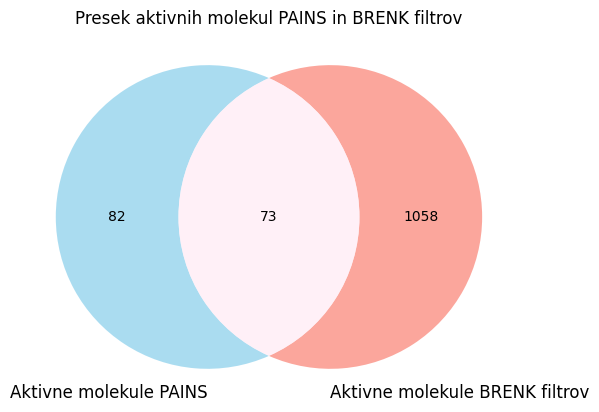

In [10]:
import seaborn as sns
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted 
from matplotlib_venn import venn3, venn3_circles, venn3_unweighted 
from matplotlib import pyplot as plt


active_molecules = molecules[molecules['active_inactive'] == 'active'].reset_index(drop=True)

active_molecules_pains_set = active_molecules[active_molecules['is_pains'] == 1].reset_index(drop=True)
active_molecules_brenk_set = active_molecules[active_molecules['is_brenk'] == 1].reset_index(drop=True)

set1 = set(active_molecules_pains_set['smiles'])
set2 = set(active_molecules_brenk_set['smiles'])

venn2_unweighted([set1, set2], 
                 set_labels = ('Aktivne molekule PAINS', 'Aktivne molekule BRENK filtrov'),
                 set_colors=("skyblue", "salmon"), alpha=0.7
                )

plt.title("Presek aktivnih molekul PAINS in BRENK filtrov")
plt.show()

In [11]:
# active_molecules_with_pains_or_brekt active_molecules_p_n_b
active_molecules_p_n_b = active_molecules[(active_molecules['is_pains'] == 1) | (active_molecules['is_brenk'] == 1) ].reset_index(drop=True)
#active_molecules_p_n_b.head()

In [12]:
active_molecules_p_n_b['pains_alerts'].to_list()
active_molecules_p_n_b['brenk_alerts'].to_list()

active_molecules_p_n_b.explode('pains_alerts')
active_molecules_p_n_b.explode('brenk_alerts')
# active_molecules_p_n_b.dtypes

,smiles,IC50,pIC50,ROMol,target_organism,pains_alerts,brenk_alerts,active_inactive,is_pains,is_brenk
0,O=C1c2cc([N+](=O)[O-])ccc2-n2c1nc1ccccc1c2=O,0.018,10.744727,<rdkit.Chem.rdchem.Mol object at 0x16fce49e0>,Homo sapiens,[],nitro_group,active,0,1
0,O=C1c2cc([N+](=O)[O-])ccc2-n2c1nc1ccccc1c2=O,0.018,10.744727,<rdkit.Chem.rdchem.Mol object at 0x16fce49e0>,Homo sapiens,[],Oxygen-nitrogen_single_bond,active,0,1
1,O=C1CC(c2c[nH]c3ccc(F)cc23)C(=O)N1,0.120,9.920819,<rdkit.Chem.rdchem.Mol object at 0x16fce25e0>,Homo sapiens,[],phthalimide,active,0,1
2,O=C1c2nnn(Cc3ccccc3)c2C(=O)c2nnn(Cc3ccccc3)c21,1.000,9.000000,<rdkit.Chem.rdchem.Mol object at 0x16fce69d0>,Homo sapiens,[quinone_A(370)],NaN,active,1,0
3,O/N=C(/CCC1CCCCC1)Nc1cccc(Cl)c1,1.000,9.000000,<rdkit.Chem.rdchem.Mol object at 0x16fcd3060>,Homo sapiens,[],imine_1,active,0,1
...,...,...,...,...,...,...,...,...,...,...
1212,NS(=O)(=O)NCCNc1nonc1C(=NO)Nc1cccc(C(F)(F)F)c1,500.000,6.301030,<rdkit.Chem.rdchem.Mol object at 0x16fccae30>,Homo sapiens,[],Aliphatic_long_chain,active,0,1
1212,NS(=O)(=O)NCCNc1nonc1C(=NO)Nc1cccc(C(F)(F)F)c1,500.000,6.301030,<rdkit.Chem.rdchem.Mol object at 0x16fccae30>,Homo sapiens,[],imine_1,active,0,1
1212,NS(=O)(=O)NCCNc1nonc1C(=NO)Nc1cccc(C(F)(F)F)c1,500.000,6.301030,<rdkit.Chem.rdchem.Mol object at 0x16fccae30>,Homo sapiens,[],imine_2,active,0,1
1212,NS(=O)(=O)NCCNc1nonc1C(=NO)Nc1cccc(C(F)(F)F)c1,500.000,6.301030,<rdkit.Chem.rdchem.Mol object at 0x16fccae30>,Homo sapiens,[],oxime_1,active,0,1


In [13]:
df_exploded_pains = active_molecules_p_n_b.explode(['pains_alerts'])
distinct_smiles_counts_pains = df_exploded_pains.groupby('pains_alerts')['smiles'].nunique().reset_index(name='distinct_smiles_count')
distinct_smiles_counts_pains

,pains_alerts,distinct_smiles_count
0,anil_di_alk_A(478),1
1,anil_di_alk_C(246),3
2,ene_one_hal(17),3
3,imine_one_A(321),9
4,keto_keto_gamma(5),1
5,mannich_A(296),1
6,quinone_A(370),140
7,quinone_D(2),9


In [14]:
df_exploded_brenk = active_molecules_p_n_b.explode(['brenk_alerts'])

In [15]:
distinct_smiles_counts_brenk = df_exploded_brenk.groupby('brenk_alerts')['smiles'].nunique().reset_index(name='distinct_smiles_count')
#distinct_smiles_counts_brenk
molecules

,smiles,IC50,pIC50,ROMol,target_organism,pains_alerts,brenk_alerts,active_inactive,is_pains,is_brenk
0,O=C1c2cc([N+](=O)[O-])ccc2-n2c1nc1ccccc1c2=O,0.018,10.744727,<rdkit.Chem.rdchem.Mol object at 0x16fce49e0>,Homo sapiens,[],"[nitro_group, Oxygen-nitrogen_single_bond]",active,0,1
1,Cc1cc(C2CC2)ncc1-c1ccc(C2(C(=O)Nc3ccc(F)cc3)CO...,0.080,10.096910,<rdkit.Chem.rdchem.Mol object at 0x16fcb09e0>,Homo sapiens,[],[],active,0,0
2,O=C(Nc1ccc(C2(C(=O)Nc3ccc(F)cc3)COC2)cc1)c1ccc...,0.090,10.045757,<rdkit.Chem.rdchem.Mol object at 0x16fcdcba0>,Homo sapiens,[],[],active,0,0
3,O=C(Nc1ccc(F)cc1)C1(C2CCC3C(CCCN3c3ccnc(C(F)(F...,0.100,10.000000,<rdkit.Chem.rdchem.Mol object at 0x16fcddcb0>,Homo sapiens,[],[],active,0,0
4,O=C1CC(c2c[nH]c3ccc(F)cc23)C(=O)N1,0.120,9.920819,<rdkit.Chem.rdchem.Mol object at 0x16fce25e0>,Homo sapiens,[],[phthalimide],active,0,1
...,...,...,...,...,...,...,...,...,...,...
4286,FC(F)(F)c1ccc(-c2c[nH]nn2)cc1,2300000.000,2.638272,<rdkit.Chem.rdchem.Mol object at 0x16fcbef10>,Homo sapiens,[],[],inactive,0,0
4287,c1ccc2[nH]nnc2c1,2570000.000,2.590067,<rdkit.Chem.rdchem.Mol object at 0x16fcf54d0>,Homo sapiens,[],[],inactive,0,0
4288,Cc1cccc(NC(=O)C(F)(F)F)c1-c1c[nH]nn1,3000000.000,2.522879,<rdkit.Chem.rdchem.Mol object at 0x16fcb5230>,Homo sapiens,[],[],inactive,0,0
4289,Cc1ccc(N)cc1-c1c[nH]nn1,3200000.000,2.494850,<rdkit.Chem.rdchem.Mol object at 0x16fcb2500>,Homo sapiens,[],[aniline],inactive,0,1


In [16]:
def check_pains_alerts(molecule_row):
    elements_to_check = ['ene_cyano_A(19)', 'imine_one_A(321)', 'quinone_D(2)','quinone_A(370)']
    for element in elements_to_check:
        if element in molecule_row['pains_alerts']:
            return 1
    return 0

molecules['pains_for_exclusions'] = molecules.apply(check_pains_alerts, axis=1)
molecules

,smiles,IC50,pIC50,ROMol,target_organism,pains_alerts,brenk_alerts,active_inactive,is_pains,is_brenk,pains_for_exclusions
0,O=C1c2cc([N+](=O)[O-])ccc2-n2c1nc1ccccc1c2=O,0.018,10.744727,<rdkit.Chem.rdchem.Mol object at 0x16fce49e0>,Homo sapiens,[],"[nitro_group, Oxygen-nitrogen_single_bond]",active,0,1,0
1,Cc1cc(C2CC2)ncc1-c1ccc(C2(C(=O)Nc3ccc(F)cc3)CO...,0.080,10.096910,<rdkit.Chem.rdchem.Mol object at 0x16fcb09e0>,Homo sapiens,[],[],active,0,0,0
2,O=C(Nc1ccc(C2(C(=O)Nc3ccc(F)cc3)COC2)cc1)c1ccc...,0.090,10.045757,<rdkit.Chem.rdchem.Mol object at 0x16fcdcba0>,Homo sapiens,[],[],active,0,0,0
3,O=C(Nc1ccc(F)cc1)C1(C2CCC3C(CCCN3c3ccnc(C(F)(F...,0.100,10.000000,<rdkit.Chem.rdchem.Mol object at 0x16fcddcb0>,Homo sapiens,[],[],active,0,0,0
4,O=C1CC(c2c[nH]c3ccc(F)cc23)C(=O)N1,0.120,9.920819,<rdkit.Chem.rdchem.Mol object at 0x16fce25e0>,Homo sapiens,[],[phthalimide],active,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4286,FC(F)(F)c1ccc(-c2c[nH]nn2)cc1,2300000.000,2.638272,<rdkit.Chem.rdchem.Mol object at 0x16fcbef10>,Homo sapiens,[],[],inactive,0,0,0
4287,c1ccc2[nH]nnc2c1,2570000.000,2.590067,<rdkit.Chem.rdchem.Mol object at 0x16fcf54d0>,Homo sapiens,[],[],inactive,0,0,0
4288,Cc1cccc(NC(=O)C(F)(F)F)c1-c1c[nH]nn1,3000000.000,2.522879,<rdkit.Chem.rdchem.Mol object at 0x16fcb5230>,Homo sapiens,[],[],inactive,0,0,0
4289,Cc1ccc(N)cc1-c1c[nH]nn1,3200000.000,2.494850,<rdkit.Chem.rdchem.Mol object at 0x16fcb2500>,Homo sapiens,[],[aniline],inactive,0,1,0


In [17]:
count_pains_for_exclusion = molecules[molecules['pains_for_exclusions'] == 1].count()['smiles']
count_pains_total = molecules[molecules['is_pains'] == 1].count()['smiles']
print(f'Count of all PAINS molecules is {count_pains_total}, count of PAINS with ene_cyano_A(19), imine_one_A(321),\
quinone_D(2) or quinone_A(370) is {count_pains_for_exclusion}')

Count of all PAINS molecules is 435, count of PAINS with ene_cyano_A(19), imine_one_A(321),quinone_D(2) or quinone_A(370) is 362


In [18]:
count_pains_for_exclusion_a = molecules[(molecules['pains_for_exclusions'] == 1) & (molecules['active_inactive'] == 'active')].count()['smiles']
count_pains_total_a = molecules[(molecules['is_pains'] == 1) & (molecules['active_inactive'] == 'active')].count()['smiles']
print(f'Count of all active PAINS molecules is {count_pains_total_a}, count of active PAINS with ene_cyano_A(19), imine_one_A(321),\
quinone_D(2) or quinone_A(370) is {count_pains_for_exclusion_a}')

Count of all active PAINS molecules is 155, count of active PAINS with ene_cyano_A(19), imine_one_A(321),quinone_D(2) or quinone_A(370) is 149


# Končna izkljucitev PAINS in BRENK molekul

In [19]:
def classify_active_molecules_w_p_n_b(row):
    active_inactive = row['active_inactive']
    pains_for_exclusions = row['pains_for_exclusions']

    if active_inactive == 'inactive':
        return 'inactive'
    elif active_inactive == 'active' and (pains_for_exclusions == 1):
        return 'exclude'
    else:
        return 'active'

# Assuming 'is_pains' and 'is_brenk' are columns in the 'molecules' DataFrame
molecules['active_with_exclusions'] = molecules.apply(classify_active_molecules_w_p_n_b, axis=1)
count_by_category = molecules['active_with_exclusions'].value_counts()
count_by_category

active_with_exclusions
active      2103
inactive    2039
exclude      149
Name: count, dtype: int64

In [20]:
molecules_w_excl = molecules[(molecules['active_with_exclusions'] != 'exclude') ].reset_index(drop=True)
molecules_w_excl

,smiles,IC50,pIC50,ROMol,target_organism,pains_alerts,brenk_alerts,active_inactive,is_pains,is_brenk,pains_for_exclusions,active_with_exclusions
0,O=C1c2cc([N+](=O)[O-])ccc2-n2c1nc1ccccc1c2=O,0.018,10.744727,<rdkit.Chem.rdchem.Mol object at 0x16fce49e0>,Homo sapiens,[],"[nitro_group, Oxygen-nitrogen_single_bond]",active,0,1,0,active
1,Cc1cc(C2CC2)ncc1-c1ccc(C2(C(=O)Nc3ccc(F)cc3)CO...,0.080,10.096910,<rdkit.Chem.rdchem.Mol object at 0x16fcb09e0>,Homo sapiens,[],[],active,0,0,0,active
2,O=C(Nc1ccc(C2(C(=O)Nc3ccc(F)cc3)COC2)cc1)c1ccc...,0.090,10.045757,<rdkit.Chem.rdchem.Mol object at 0x16fcdcba0>,Homo sapiens,[],[],active,0,0,0,active
3,O=C(Nc1ccc(F)cc1)C1(C2CCC3C(CCCN3c3ccnc(C(F)(F...,0.100,10.000000,<rdkit.Chem.rdchem.Mol object at 0x16fcddcb0>,Homo sapiens,[],[],active,0,0,0,active
4,O=C1CC(c2c[nH]c3ccc(F)cc23)C(=O)N1,0.120,9.920819,<rdkit.Chem.rdchem.Mol object at 0x16fce25e0>,Homo sapiens,[],[phthalimide],active,0,1,0,active
...,...,...,...,...,...,...,...,...,...,...,...,...
4137,FC(F)(F)c1ccc(-c2c[nH]nn2)cc1,2300000.000,2.638272,<rdkit.Chem.rdchem.Mol object at 0x16fcbef10>,Homo sapiens,[],[],inactive,0,0,0,inactive
4138,c1ccc2[nH]nnc2c1,2570000.000,2.590067,<rdkit.Chem.rdchem.Mol object at 0x16fcf54d0>,Homo sapiens,[],[],inactive,0,0,0,inactive
4139,Cc1cccc(NC(=O)C(F)(F)F)c1-c1c[nH]nn1,3000000.000,2.522879,<rdkit.Chem.rdchem.Mol object at 0x16fcb5230>,Homo sapiens,[],[],inactive,0,0,0,inactive
4140,Cc1ccc(N)cc1-c1c[nH]nn1,3200000.000,2.494850,<rdkit.Chem.rdchem.Mol object at 0x16fcb2500>,Homo sapiens,[],[aniline],inactive,0,1,0,inactive


In [21]:
molecules_w_excl_n = molecules_w_excl[['smiles', 'ROMol', 'active_with_exclusions']]
#molecules_w_excl_n

In [22]:
df = molecules_w_excl_n

In [23]:
df.rename(columns = {'smiles': 'Smiles'}, inplace = True)
df['Activity'] = df['active_with_exclusions'].apply(lambda x: 1 if x == 'active' else 0)
df.drop('active_with_exclusions', axis = 'columns', inplace = True)
df.reset_index(drop = True, inplace = True)
df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {df.shape}")

DataFrame shape: (4142, 3)


/var/folders/fn/v7kdx_6j0gv8rm308v5x0m4h0000gn/T/ipykernel_6277/2211078330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'smiles': 'Smiles'}, inplace = True)
/var/folders/fn/v7kdx_6j0gv8rm308v5x0m4h0000gn/T/ipykernel_6277/2211078330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Activity'] = df['active_with_exclusions'].apply(lambda x: 1 if x == 'active' else 0)
/var/folders/fn/v7kdx_6j0gv8rm308v5x0m4h0000gn/T/ipykernel_6277/2211078330.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [24]:
df

,Smiles,ROMol,Activity
0,O=C1c2cc([N+](=O)[O-])ccc2-n2c1nc1ccccc1c2=O,<rdkit.Chem.rdchem.Mol object at 0x16fce49e0>,1
1,Cc1cc(C2CC2)ncc1-c1ccc(C2(C(=O)Nc3ccc(F)cc3)CO...,<rdkit.Chem.rdchem.Mol object at 0x16fcb09e0>,1
2,O=C(Nc1ccc(C2(C(=O)Nc3ccc(F)cc3)COC2)cc1)c1ccc...,<rdkit.Chem.rdchem.Mol object at 0x16fcdcba0>,1
3,O=C(Nc1ccc(F)cc1)C1(C2CCC3C(CCCN3c3ccnc(C(F)(F...,<rdkit.Chem.rdchem.Mol object at 0x16fcddcb0>,1
4,O=C1CC(c2c[nH]c3ccc(F)cc23)C(=O)N1,<rdkit.Chem.rdchem.Mol object at 0x16fce25e0>,1
...,...,...,...
4137,FC(F)(F)c1ccc(-c2c[nH]nn2)cc1,<rdkit.Chem.rdchem.Mol object at 0x16fcbef10>,0
4138,c1ccc2[nH]nnc2c1,<rdkit.Chem.rdchem.Mol object at 0x16fcf54d0>,0
4139,Cc1cccc(NC(=O)C(F)(F)F)c1-c1c[nH]nn1,<rdkit.Chem.rdchem.Mol object at 0x16fcb5230>,0
4140,Cc1ccc(N)cc1-c1c[nH]nn1,<rdkit.Chem.rdchem.Mol object at 0x16fcb2500>,0


In [25]:
df.to_csv(f'{path_files}/dp.csv',index=False)